# Executor
### Use to take measurements

In [2]:
import nidaqmx
from nidaqmx import Task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DAQ
from data_structures import experiment

# Live plots
import matplotlib
%matplotlib notebook
import IPython
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 70em; width:120em}</style>"))

# Electrochemical Impedance Spectroscopy

In [13]:
'''=========================USER INPUTS========================================'''
E_DC = -0.825 # DC potential in V
E_AC = 0.010 # AC perturbation in V
low_freq = .1 # Lower limit of frequencies to be measured in Hz

Rm = 1000 # Rm resistance in Ohms
Cm = 1.0e6 # Cm capacitance in Farads

<IPython.core.display.Javascript object>


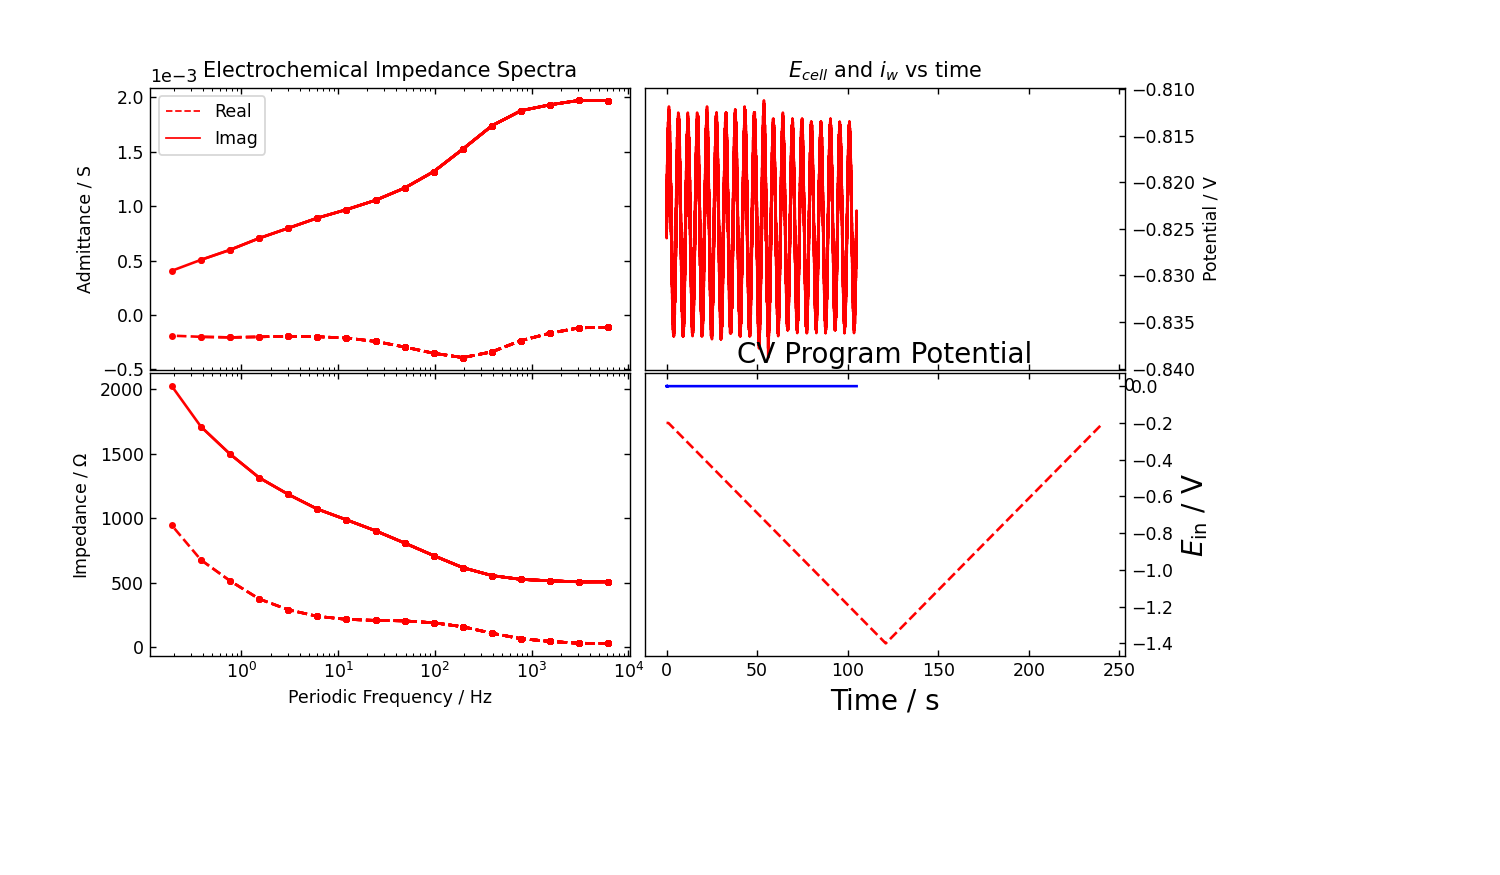

<IPython.core.display.Javascript object>


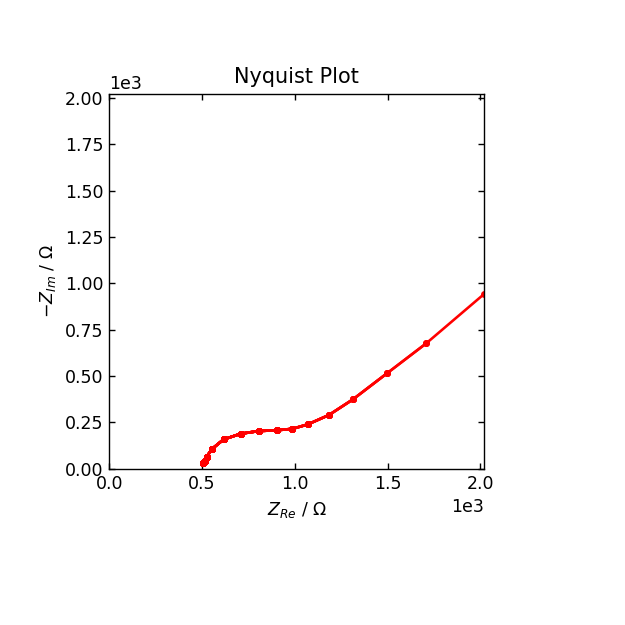

C:\Users\jgage\Documents\GitHub\CHEM274\data_structures.py:39: ResourceWarning: unclosed file <_io.BufferedWriter name='C:/Users/jgage/Documents/GitHub/CHEM274/data/EIS_Feacac_GC_MeCN_P-03-04.xlsx'>
  self.filepath = self.filepath.name


ValueError: This sheet is too large! Your sheet size is: 1310720, 7 Max sheet size is: 1048576, 16384

In [10]:
data_EIS, params_EIS, opt_EIS = DAQ.take_EIS(E_DC, E_AC, low_freq, Rm, Cm)
latest_EIS = experiment(data_EIS, params_EIS, opt_EIS)
latest_EIS.to_excel()

# Cyclic Voltammetry

In [ ]:
latest_EIS.to_excel()

In [11]:
'''=========================USER INPUTS========================================'''
samp_rate = 3600 # sampling rate (samples/s) Use an integral multiple of 120/s and at least 3600 per volt
scan_rate = .01 # scan rate (V/s)
# buffer_size = 3600 # passed as a default argument, but changeable.

'''Set up potential profile'''
h_time = 1  # hold time before sweep in seconds
# potential bounds for each section
f_start_pot = -0.2# Initial potential
f_end_pot = -1.4   # Vertex potential

pot_profile, samp_num_tot, scan_rate = DAQ.set_potential_profile(f_start_pot, f_end_pot, samp_rate, scan_rate, h_time)

<IPython.core.display.Javascript object>


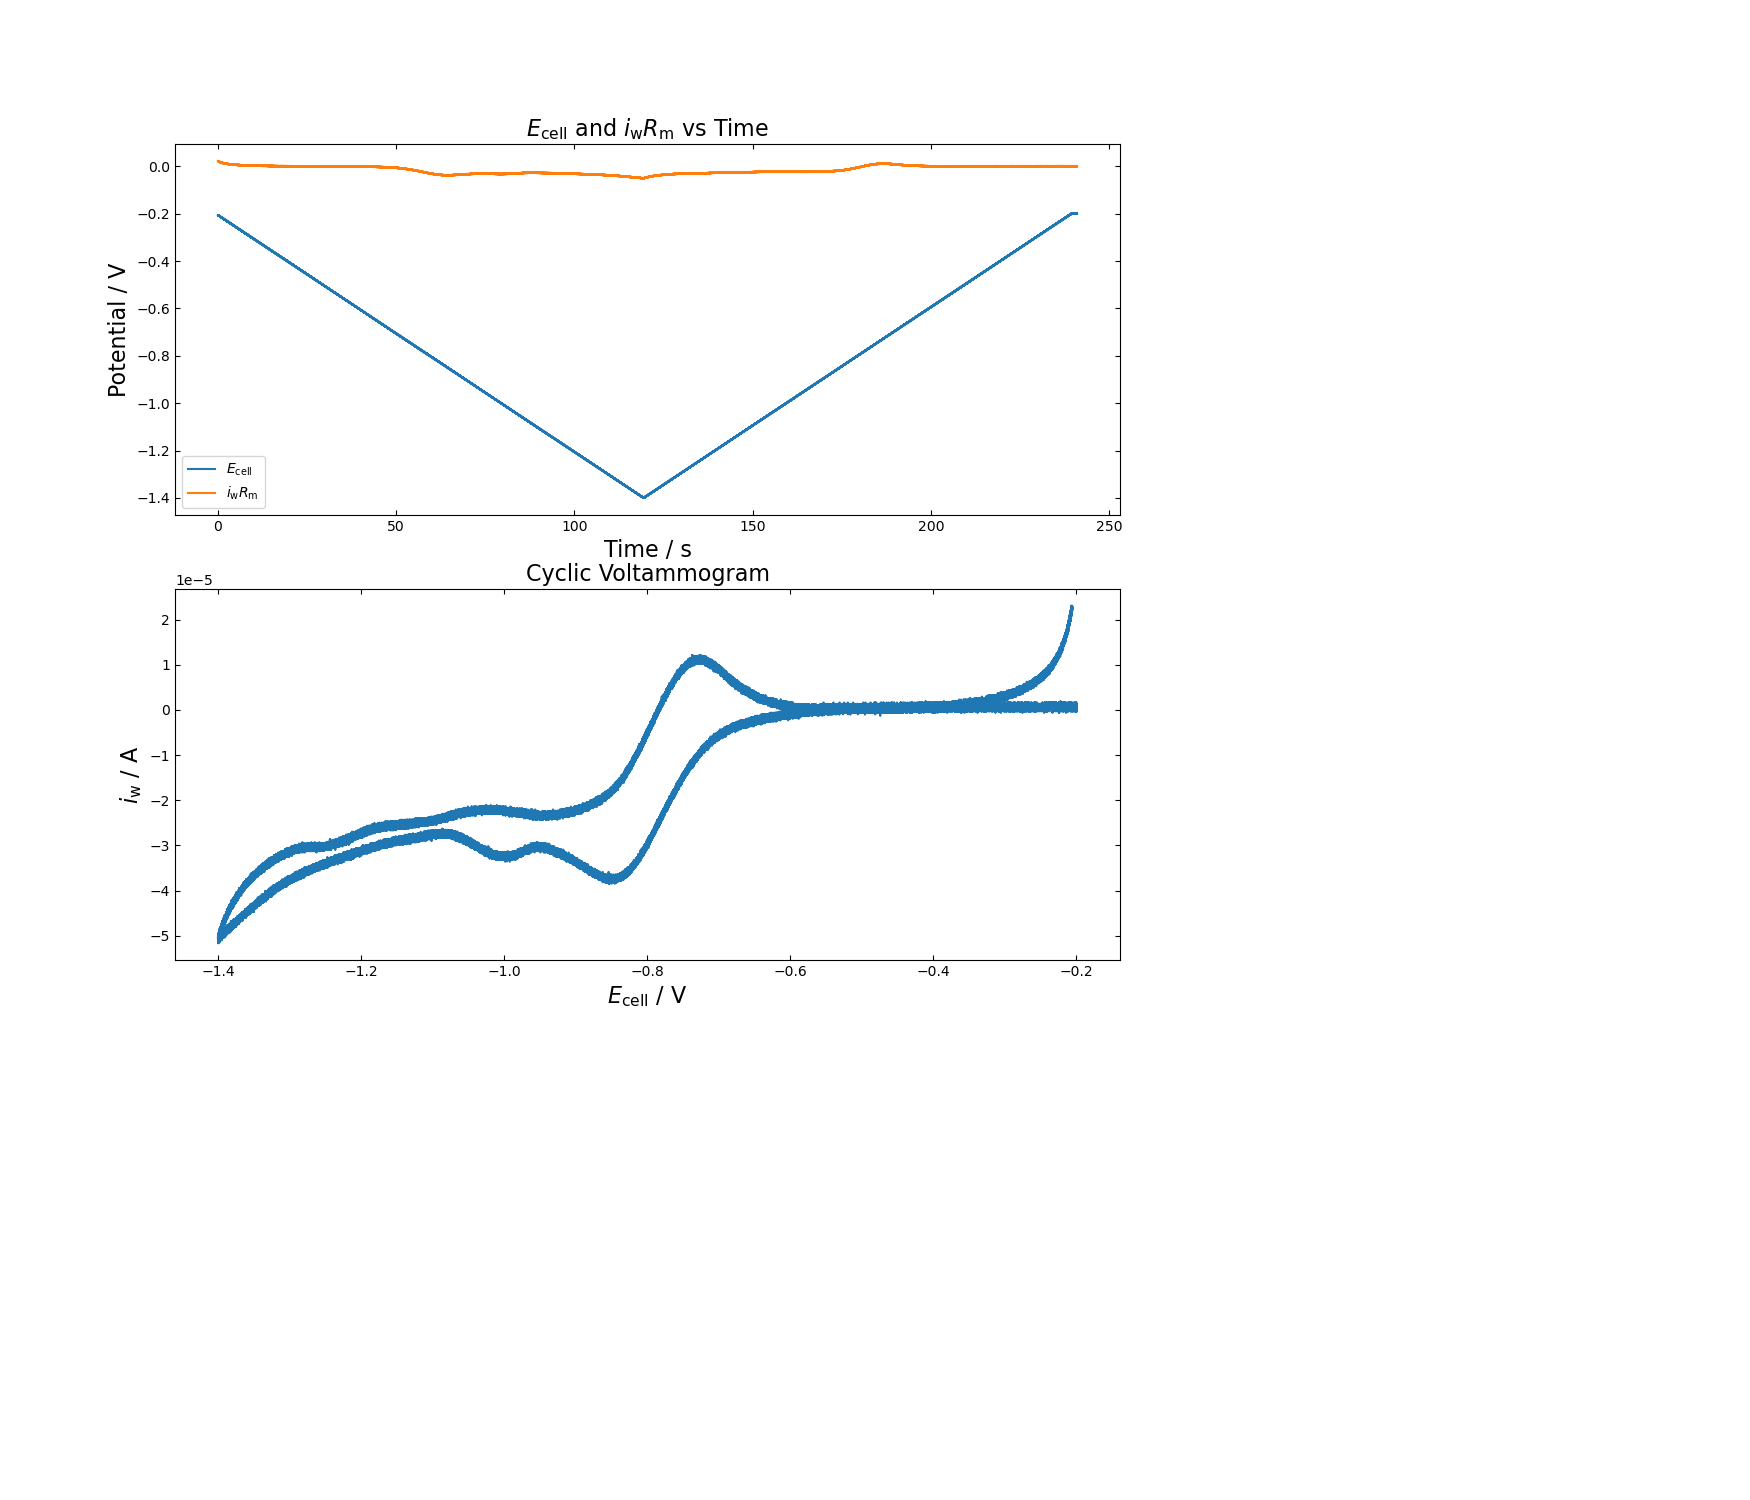

Must press Enter to end execution of code block


C:\Users\jgage\Documents\GitHub\CHEM274\data_structures.py:39: ResourceWarning: unclosed file <_io.BufferedWriter name='C:/Users/jgage/Documents/GitHub/CHEM274/data/Feacac_GC_MeCN_v=.01Vs-1_P-03-05.xlsx'>
  self.filepath = self.filepath.name


In [ ]:
df_CV, params_CV = DAQ.take_CV(pot_profile, samp_num_tot, scan_rate, Rm, Cm)
latest_CV = experiment(df_CV, params_CV)
latest_CV.to_excel()